# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.332322e+01     1.337633e+01
 * time: 0.00347900390625
     1     6.363690e+01     8.045538e+00
 * time: 0.010068178176879883
     2     5.786726e+01     9.985397e+00
 * time: 0.025396108627319336
     3     4.116687e+01     7.882205e+00
 * time: 0.04610300064086914
     4     2.985080e+01     7.037722e+00
 * time: 0.12855815887451172
     5     2.020091e+01     4.332742e+00
 * time: 0.14631199836730957
     6     1.390164e+01     3.714278e+00
 * time: 0.16118907928466797
     7     1.113160e+01     5.828848e+00
 * time: 0.173112154006958
     8     9.552030e+00     3.514706e+00
 * time: 0.18834900856018066
     9     8.558493e+00     2.962752e+00
 * time: 0.2034602165222168
    10     7.957844e+00     3.133254e+00
 * time: 0.25309205055236816
    11     7.287184e+00     2.738873e+00
 * time: 0.26509904861450195
    12     6.748189e+00     1.550928e+00
 * time: 0.27721714973449707
    13     6.423920e+00     1.286994e+00
 * time: 0.2

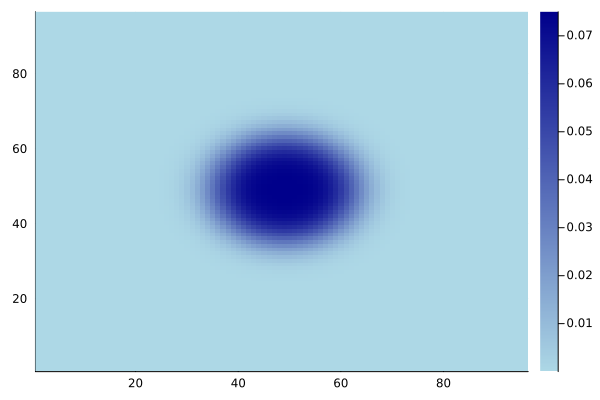

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)